In [1]:
from qiskit import QuantumRegister
register = QuantumRegister(4, 'myregister')

In [2]:
from qiskit import QuantumCircuit, QuantumRegister
register = QuantumRegister(4, 'myregister')
circuit = QuantumCircuit(register)

In [3]:
# First, import all the necessary python modules
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_distribution
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit_ibm_runtime.accounts import AccountNotFoundError
# qc_workbook is the original module written for this workbook
# If you encounter an ImportError, edit the environment variable PYTHONPATH or sys.path
from qc_workbook.utils import operational_backend

print('notebook ready')

ModuleNotFoundError: No module named 'qc_workbook'

In [8]:
circuit = QuantumCircuit(2)  # You can also create a circuit by specifying the number of bits without using a register
circuit.h(0)  # Qubits can be addressed by their index within the circuit
circuit.ry(np.pi / 2., 0)  #　θ = π/2
circuit.x(0)
# Measurement is always needed to get an output
circuit.measure_all()

print(f'This circuit has {circuit.num_qubits} qubits and {circuit.size()} operations')

This circuit has 2 qubits and 5 operations


In [9]:
theta1 = 2. * np.arctan(np.sqrt(7. / 3.))
theta2 = 2. * np.arctan(np.sqrt(2.))
theta3 = 2. * np.arctan(np.sqrt(4. / 3))

circuit = QuantumCircuit(2)
circuit.ry(theta1, 1)
circuit.ry(theta2, 0)
circuit.cry(theta3 - theta2, 1, 0)  # C[Ry]　1が制御で0が標的
circuit.cz(0, 1)  # C[Z] 0が制御で1が標的（実はC[Z]ではどちらが制御でも結果は同じ）
circuit.measure_all()

print(f'This circuit has {circuit.num_qubits} qubits and {circuit.size()} operations')

This circuit has 2 qubits and 6 operations


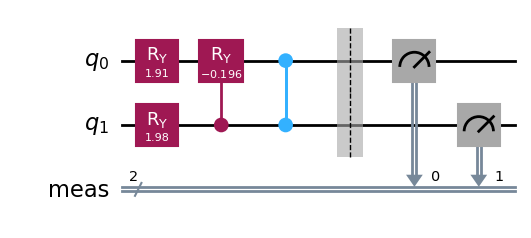

In [10]:
circuit.draw('mpl')

In [11]:
circuit.draw()

┌────────────┐┌──────────────┐    ░ ┌─┐   
   q_0: ┤ Ry(1.9106) ├┤ Ry(-0.19649) ├─■──░─┤M├───
        ├────────────┤└──────┬───────┘ │  ░ └╥┘┌─┐
   q_1: ┤ Ry(1.9823) ├───────■─────────■──░──╫─┤M├
        └────────────┘                    ░  ║ └╥┘
meas: 2/═════════════════════════════════════╩══╩═
                                             0  1

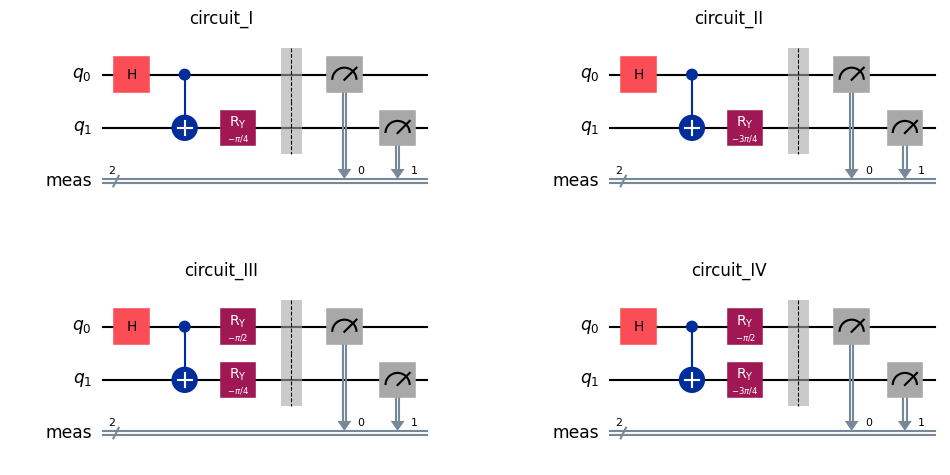

In [12]:
circuits = []

# Circuit I - H, CX[0, 1], Ry(-π/4)[1]
circuit = QuantumCircuit(2, name='circuit_I')
circuit.h(0)
circuit.cx(0, 1)
circuit.ry(-np.pi / 4., 1)
circuit.measure_all()
# Append to list
circuits.append(circuit)

# Circuit II - H, CX[0, 1], Ry(-3π/4)[1]
circuit = QuantumCircuit(2, name='circuit_II')
circuit.h(0)
circuit.cx(0, 1)
circuit.ry(-3. * np.pi / 4., 1)
circuit.measure_all()
# Append to list
circuits.append(circuit)

# Circuit III - H, CX[0, 1], Ry(-π/4)[1], Ry(-π/2)[0]
circuit = QuantumCircuit(2, name='circuit_III')
circuit.h(0)
circuit.cx(0, 1)
circuit.ry(-np.pi / 4., 1)
circuit.ry(-np.pi / 2., 0)
circuit.measure_all()
# Append to list
circuits.append(circuit)

# Circuit IV - H, CX[0, 1], Ry(-3π/4)[1], Ry(-π/2)[0]
circuit = QuantumCircuit(2, name='circuit_IV')
circuit.h(0)
circuit.cx(0, 1)
circuit.ry(-3. * np.pi / 4., 1)
circuit.ry(-np.pi / 2., 0)
circuit.measure_all()
# Append to list
circuits.append(circuit)

# draw() can accept a matplotlib Axes object as an argument, to which the circuit will be drawn
# This is useful when visualizing multiple circuits from a single Jupyter cell
fig, axs = plt.subplots(2, 2, figsize=[12., 6.])
for circuit, ax in zip(circuits, axs.reshape(-1)):
    circuit.draw('mpl', ax=ax)
    ax.set_title(circuit.name)

In [14]:
from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
    token='5086e1c440a84e2a66e645089c18f33ebdd628ac30319351e54d4cd4a8336cb044acd98b4d8b994613a44c4f3017889a54bec1eb03c01baca9fb12b7e0d99790',
    #channel='ibm_quantum'  # 必須
    overwrite=True  # 既存のアカウント情報を上書きする場合はTrueに設定
)


InvalidAccountError: "Invalid `instance` value. Expected a non-empty string, got 'None'. If using the ibm_quantum channel, please specify the channel when saving your account with `channel = 'ibm_quantum'`."

In [15]:
#超重要　IBM Quantum接続
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel='ibm_quantum')

In [16]:
# Specify an instance if you have access to multiple (e.g. premium access plan）
# instance = 'hub-x/group-y/project-z'
instance = None

try:
    service = QiskitRuntimeService(channel='ibm_quantum', instance=instance)
except AccountNotFoundError:
    service = QiskitRuntimeService(channel='ibm_quantum', token='__paste_your_token_here__', instance=instance)

In [17]:
backend = service.least_busy()


In [19]:
# Find the backend that is operational and has the shortest job queue
backend = service.least_busy(filters=operational_backend())
sampler = Sampler(backend)

print(f'Jobs will run on {backend.name}')

NameError: name 'operational_backend' is not defined

In [21]:
# max_shots = the maximum number of allowed shots for this backend with the access parameters
shots = min(backend.max_shots, 2000)
print(f'Running four circuits, {shots} shots each')

circuits = transpile(circuits, backend=backend)
# Execute each circuit for `shots` times
job = sampler.run(circuits, shots=shots)

C:\Users\naoki\AppData\Local\Temp\ipykernel_20340\1154875945.py:2: DeprecationWarning: max_shots is deprecated as of qiskit-ibm-runtime 0.37.0 and will be removed no sooner than 3 months after the release date. Please see our documentation on job limits https://docs.quantum.ibm.com/guides/job-limits#job-limits.
  shots = min(backend.max_shots, 2000)


Running four circuits, 2000 shots each


NameError: name 'sampler' is not defined

In [22]:
result = job.result()

# List to collect the histogram data from the four circuits
counts_list = []

# Extracting the bit sequence counts from the result object
for idx in range(4):
    # get_counts(i) returns the histogram data for circuit i
    counts = result[idx].data.meas.get_counts()
    # Append to list
    counts_list.append(counts)

print(counts_list)

NameError: name 'job' is not defined

NameError: name 'counts_list' is not defined

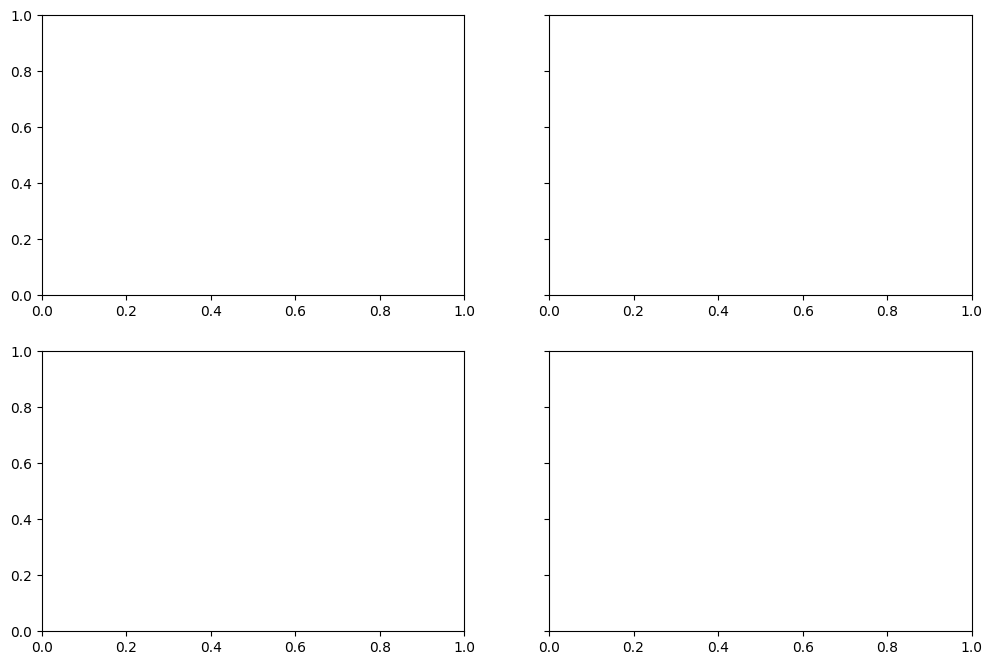

In [23]:
fig, axs = plt.subplots(2, 2, sharey=True, figsize=[12., 8.])
for counts, circuit, ax in zip(counts_list, circuits, axs.reshape(-1)):
    plot_distribution(counts, ax=ax)
    ax.set_title(circuit.name)
    ax.yaxis.grid(True)

In [24]:
# C^I, C^II, C^III, C^IVを一つのアレイにする
#（今の場合ただのリストにしてもいいが、純粋な数字の羅列にはnumpy arrayを使うといいことが多い）
c_arr = np.zeros(4, dtype=float)

# enumerate(L)でリストのインデックスと対応する要素に関するループを回せる
for ic, counts in enumerate(counts_list):
    # counts['00'] でなく counts.get('00', 0) - 上のテキストを参照
    c_arr[ic] = counts.get('00', 0) + counts.get('11', 0) - counts.get('01', 0) - counts.get('10', 0)

# 4つの要素を同時にshotsで規格化（リストではこういうことはできない）
c_arr /= shots

s_val = c_arr[0] - c_arr[1] + c_arr[2] + c_arr[3]

print('C:', c_arr)
print('S =', s_val)
if s_val > 2.:
    print('Yes, we are using a quantum computer!')
else:
    print('Armonk, we have a problem.')

NameError: name 'counts_list' is not defined